In [1]:
#init
import numpy as np
np.random.seed(1337)
import tensorflow as tf

import pandas as pd
from statsmodels.tsa.api import VAR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from matplotlib.pyplot import *
from datetime import datetime

from ml_pap import *

matplotlib.pyplot.style.use('classic')
#%reload_ext tensorboard

In [2]:
#import s&p data
sp500 = pd.read_csv('^GSPC.csv', header = 0, index_col = 'Date')
sp500.index = pd.to_datetime(sp500.index, format = '%d-%m-%y')
sp500 = sp500[1:]

#import nifty50 data
nifty = pd.read_csv('^NSEI.csv', header = 0, index_col = 'Date')
nifty.index = pd.to_datetime(nifty.index, format = '%d-%m-%y')
nifty = nifty.reindex(index = sp500.index, method = 'bfill')
nifty.fillna(method = 'bfill', inplace=True)

sing_sti = pd.read_csv('^sti_d.csv', header = 0, index_col = 'Date')
sing_sti.index = pd.to_datetime(sing_sti.index, format = '%Y-%m-%d')
sing_sti = sing_sti.reindex(index = sp500.index, method = 'bfill')
sing_sti.fillna(method = 'bfill', inplace=True)

uk_100 = pd.read_csv('^ukx_d.csv', header = 0, index_col = 'Date')
uk_100.index = pd.to_datetime(uk_100.index, format = '%Y-%m-%d')
uk_100 = uk_100.reindex(index = sp500.index, method = 'bfill')
uk_100.fillna(method = 'bfill', inplace=True)

hangseng = pd.read_csv('^hsi_d.csv', header = 0, index_col = 'Date')
hangseng.index = pd.to_datetime(hangseng.index, format = '%Y-%m-%d')
hangseng = hangseng.reindex(index = sp500.index, method = 'bfill')
hangseng.fillna(method = 'bfill', inplace=True)

nikkei = pd.read_csv('^nkx_d.csv', header = 0, index_col = 'Date')
nikkei.index = pd.to_datetime(nikkei.index, format = '%Y-%m-%d')
nikkei = nikkei.reindex(index = sp500.index, method = 'bfill')
nikkei.fillna(method = 'bfill', inplace=True)

shanghai_comp = pd.read_csv('^shc_d.csv', header = 0, index_col = 'Date')
shanghai_comp.index = pd.to_datetime(shanghai_comp.index, format = '%Y-%m-%d')
shanghai_comp = shanghai_comp.reindex(index = sp500.index, method = 'bfill')
shanghai_comp.fillna(method = 'bfill', inplace=True)

In [3]:
df = pd.DataFrame(index = sp500.index)
df['nifty'] = nifty['Close']
df['sing_sti'] = sing_sti['Close']
df['hangseng'] = hangseng['Close']
df['nikkei'] = nikkei['Close']
df['shanghai_comp'] = shanghai_comp['Close']
df['sp500'] = sp500['Close']
df['uk_100'] = uk_100['Close']

data_cache = df.copy()
    
data_cache.dropna(inplace = True)
data_cache

,nifty,sing_sti,hangseng,nikkei,shanghai_comp,sp500,uk_100
Date,,,,,,,
2008-01-03,6178.549805,3397.06,26887.30,14691.41,5319.850,1447.160034,6479.39
2008-01-04,6274.299805,3437.79,27519.70,14691.41,5361.560,1411.630005,6348.50
2008-01-07,6279.100098,3353.06,27179.50,14500.54,5393.330,1416.180054,6335.70
2008-01-08,6287.850098,3338.27,27112.90,14528.66,5386.520,1390.189941,6356.50
2008-01-09,6272.000000,3344.53,27615.80,14599.16,5435.810,1409.130005,6272.70
...,...,...,...,...,...,...,...
2020-04-23,9313.900391,2542.37,23977.32,19429.44,2838.499,2797.800049,5826.61
2020-04-24,9154.400391,2518.16,23831.33,19262.00,2808.529,2836.739990,5752.23
2020-04-27,9282.299805,2549.40,24280.14,19783.22,2815.494,2878.479980,5846.79


In [4]:
for label in data_cache.columns[1:]:
    resids = var_resids('nifty', label, data_cache = data_cache)
    data_cache[str.format("nifty_var_%s"%(label))] = resids
    
data_cache.dropna(inplace = True)
data_cache

D:\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

,nifty,sing_sti,hangseng,nikkei,shanghai_comp,sp500,uk_100,nifty_var_sing_sti,nifty_var_hangseng,nifty_var_nikkei,nifty_var_shanghai_comp,nifty_var_sp500,nifty_var_uk_100
Date,,,,,,,,,,,,,
2008-01-17,5913.200195,3139.87,25115.00,13783.45,5151.620,1333.250000,5902.39,10.448055,-1.942934,-19.179481,-13.795063,-16.142791,-3.289237
2008-01-18,5705.299805,3104.25,25201.90,13861.29,5180.500,1325.189941,5901.70,-217.518064,-204.638962,-222.601877,-201.906508,-163.386907,-181.904560
2008-01-22,4899.299805,2866.55,21757.60,12573.04,4559.750,1310.500000,5740.10,-789.970420,-799.679354,-793.814723,-771.311474,-808.619503,-796.939028
2008-01-23,5203.399902,2983.62,24090.20,12829.05,4703.040,1338.599976,5609.29,310.998324,299.713892,313.983660,279.505650,269.342937,287.648978
2008-01-24,5033.450195,3050.09,23539.30,13092.78,4717.730,1352.069946,5875.79,-134.105679,-148.200566,-163.048295,-132.859427,-209.210628,-140.276188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-23,9313.900391,2542.37,23977.32,19429.44,2838.499,2797.800049,5826.61,128.313512,121.817443,154.071461,144.827885,92.853749,137.453165
2020-04-24,9154.400391,2518.16,23831.33,19262.00,2808.529,2836.739990,5752.23,-163.852741,-154.591226,-149.642150,-172.443187,-144.577666,-132.429739
2020-04-27,9282.299805,2549.40,24280.14,19783.22,2815.494,2878.479980,5846.79,153.868905,145.633220,133.734245,147.184450,63.410276,145.991586


In [5]:
#squared volatility
data_cache = data_cache[-3090:-100]
data_cache['nifty_volatility'] = np.log(data_cache['nifty']/data_cache['nifty'].shift(1))**2
data_cache.dropna(inplace = True)
data_cache

D:\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,nifty,sing_sti,hangseng,nikkei,shanghai_comp,sp500,uk_100,nifty_var_sing_sti,nifty_var_hangseng,nifty_var_nikkei,nifty_var_shanghai_comp,nifty_var_sp500,nifty_var_uk_100,nifty_volatility
Date,,,,,,,,,,,,,,
2008-01-23,5203.399902,2983.62,24090.20,12829.05,4703.040,1338.599976,5609.29,310.998324,299.713892,313.983660,279.505650,269.342937,287.648978,3.626441e-03
2008-01-24,5033.450195,3050.09,23539.30,13092.78,4717.730,1352.069946,5875.79,-134.105679,-148.200566,-163.048295,-132.859427,-209.210628,-140.276188,1.102676e-03
2008-01-25,5383.350098,3159.48,25122.40,13629.16,4761.680,1330.609985,5869.00,357.546127,364.647261,356.770255,358.044605,323.396154,309.144567,4.516539e-03
2008-01-28,5274.100098,3041.06,24053.60,13087.91,4419.290,1353.959961,5788.89,-125.453198,-138.760151,-128.294548,-103.711696,-58.030628,-63.769498,4.203651e-04
2008-01-29,5280.799805,3049.89,24291.80,13478.86,4457.930,1362.300049,5885.20,31.235624,41.388599,37.967837,5.120473,8.989550,1.605353,1.611623e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-27,12100.700200,3215.53,26954.00,23437.77,2903.190,3153.629883,7429.78,56.442853,49.608151,63.484122,65.093072,47.843170,49.980976,2.724746e-05
2019-11-29,12056.049810,3193.92,26346.49,23293.91,2871.981,3140.979980,7346.53,-28.011221,-49.656198,-40.046174,-45.246303,-55.070987,-44.180352,1.366578e-05
2019-12-02,12048.200200,3187.97,26444.72,23529.50,2875.810,3113.870117,7285.94,-12.278474,-8.197770,-9.942803,-20.606068,-3.158771,2.604499,4.241983e-07


In [6]:
#data_cache.drop(['nifty_volatility'], axis = 1, inplace = True)
#data_cache = (data_cache - data_cache.mean())/data_cache.std()
data_cache['targets'] = data_cache['nifty_volatility'].shift(-1)


data_cache.dropna(inplace = True)
data_cache

D:\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,nifty,sing_sti,hangseng,nikkei,shanghai_comp,sp500,uk_100,nifty_var_sing_sti,nifty_var_hangseng,nifty_var_nikkei,nifty_var_shanghai_comp,nifty_var_sp500,nifty_var_uk_100,nifty_volatility,targets
Date,,,,,,,,,,,,,,,
2008-01-23,5203.399902,2983.62,24090.20,12829.05,4703.040,1338.599976,5609.29,310.998324,299.713892,313.983660,279.505650,269.342937,287.648978,3.626441e-03,1.102676e-03
2008-01-24,5033.450195,3050.09,23539.30,13092.78,4717.730,1352.069946,5875.79,-134.105679,-148.200566,-163.048295,-132.859427,-209.210628,-140.276188,1.102676e-03,4.516539e-03
2008-01-25,5383.350098,3159.48,25122.40,13629.16,4761.680,1330.609985,5869.00,357.546127,364.647261,356.770255,358.044605,323.396154,309.144567,4.516539e-03,4.203651e-04
2008-01-28,5274.100098,3041.06,24053.60,13087.91,4419.290,1353.959961,5788.89,-125.453198,-138.760151,-128.294548,-103.711696,-58.030628,-63.769498,4.203651e-04,1.611623e-06
2008-01-29,5280.799805,3049.89,24291.80,13478.86,4457.930,1362.300049,5885.20,31.235624,41.388599,37.967837,5.120473,8.989550,1.605353,1.611623e-06,4.695534e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-26,12037.700200,3207.85,26913.92,23373.32,2907.060,3140.520020,7403.14,-38.227362,-43.570020,-44.646334,-44.963785,-59.998883,-47.040059,8.941692e-06,2.724746e-05
2019-11-27,12100.700200,3215.53,26954.00,23437.77,2903.190,3153.629883,7429.78,56.442853,49.608151,63.484122,65.093072,47.843170,49.980976,2.724746e-05,1.366578e-05
2019-11-29,12056.049810,3193.92,26346.49,23293.91,2871.981,3140.979980,7346.53,-28.011221,-49.656198,-40.046174,-45.246303,-55.070987,-44.180352,1.366578e-05,4.241983e-07


<AxesSubplot:xlabel='Date'>

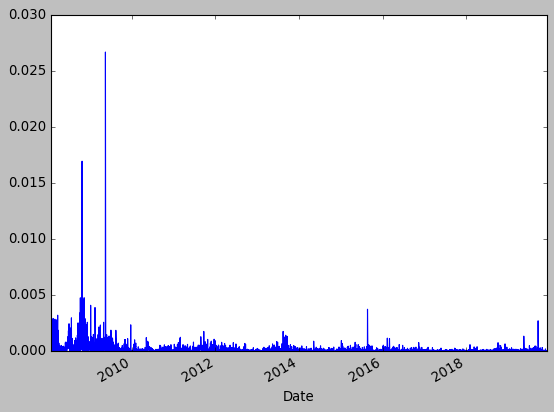

In [607]:
data_cache['targets'].plot()

In [7]:
X_train, X_test, y_train, y_test, output_scaler = make_datasets(data_cache, model_name = 'dense')
X_test.shape

(2988, 14)
(2988,)


(299, 14)

In [8]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, activation = 'relu', input_shape = (3,14), return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(100, activation = 'relu'),
    tf.keras.layers.Dense(units=1)
])

bi_lstm = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, activation = 'relu', return_sequences = True), input_shape = (3,14)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(100, activation = 'relu'),
    tf.keras.layers.Dense(units=1)
])

gru_lstm = tf.keras.Sequential([
    tf.keras.layers.GRU(100, activation = 'relu', return_sequences = True, input_shape = (3,14)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(100, activation = 'relu'),
    tf.keras.layers.Dense(units=1)
])


#result = nn_model_compile(dense, X_train, y_train)
result = svr_model(X_train, y_train, {'C' : [1,10]})

D:\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [901]:
gru_lstm.evaluate(X_test, y_test)

297/297 [==============================] - 0s 162us/sample - loss: 0.0023 - root_mean_squared_error: 0.0477


[0.002270826266338478, 0.047653187]

In [938]:
dense.evaluate(X_test, y_test)

299/299 [==============================] - 0s 80us/sample - loss: 7.8058e-04 - root_mean_squared_error: 0.0279


[0.0007805759238077633, 0.027938789]

In [9]:
y_pred = result.predict(X_test)
y_pred.shape

(299,)

In [10]:
y_test = y_test.reshape(len(y_test), 1)
y_pred = y_pred.reshape(len(y_pred), 1)
y_pred = output_scaler.inverse_transform(y_pred)
y_test = output_scaler.inverse_transform(y_test)

In [11]:
m = tf.metrics.RootMeanSquaredError()
m.update_state(y_test, np.abs(y_pred))
m.result().numpy()

0.00020515283

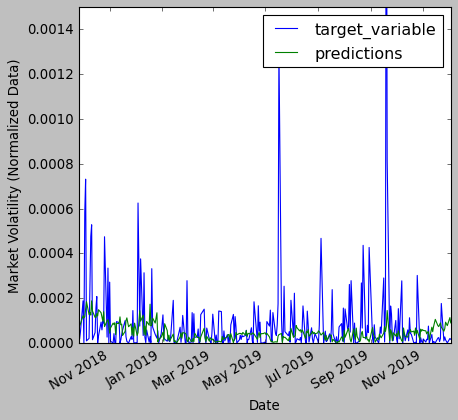

In [12]:
#df_plot = pd.DataFrame(index = data_cache.index[-len(y_test):])
df_plot = make_save_plot(data_cache.index, y_test, y_pred)

In [21]:
#%reload_ext tensorboard
%tensorboard --logdir logs\scalars

Reusing TensorBoard on port 6006 (pid 6556), started 1:53:49 ago. (Use '!kill 6556' to kill it.)